# Методы обучения без учителя.
## 1)Выберите набор данных (датасет) для решения задачи классификации или регресии.
## Импорт библиотек

In [8]:
import sys
sys.path.append("/home/ahmedkashima/venv/lib/python3.12/site-packages")
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.linear_model import LinearRegression
from typing import Dict, Tuple
from scipy import stats
from sklearn.datasets import load_iris
from IPython.display import Image
from io import StringIO 
from IPython.display import Image
import graphviz 
import pydotplus
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import adjusted_mutual_info_score
from sklearn.metrics import homogeneity_completeness_v_measure
from sklearn.metrics import silhouette_score
from itertools import cycle, islice
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
data=pd.read_csv('breast-cancer.csv',sep=",")

In [10]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
data.shape

(569, 32)

## 2)Выберите подмножество признаков датасета для анализа. Например, подмножество признаков может не включать целевой признак. Количество признаков в подмножестве должно быть более двух. Полученный датасет назовем датасетом D1.

In [12]:
D1=data[['radius_mean','texture_mean','perimeter_mean']].copy()
D_Y=data[['diagnosis']].copy()

In [13]:
D1.head()

,radius_mean,texture_mean,perimeter_mean
0,17.99,10.38,122.80
1,20.57,17.77,132.90
2,19.69,21.25,130.00
3,11.42,20.38,77.58
4,20.29,14.34,135.10


In [14]:
D_Y.head()

,diagnosis
0,M
1,M
2,M
3,M
4,M


In [15]:
D_Y=D_Y.to_numpy()
D_Ycol=D_Y.copy()

In [16]:
D_Ycol[D_Ycol==['M']] = 100
D_Ycol[D_Ycol==['B']] = 200
D_Ycol

array([[100],
       [100],
       [100],
       [100],
       [100],
       [100],
       [100],
       [100],
       [100],
       [100],
       [100],
       [100],
       [100],
       [100],
       [100],
       [100],
       [100],
       [100],
       [100],
       [200],
       [200],
       [200],
       [100],
       [100],
       [100],
       [100],
       [100],
       [100],
       [100],
       [100],
       [100],
       [100],
       [100],
       [100],
       [100],
       [100],
       [100],
       [200],
       [100],
       [100],
       [100],
       [100],
       [100],
       [100],
       [100],
       [100],
       [200],
       [100],
       [200],
       [200],
       [200],
       [200],
       [200],
       [100],
       [100],
       [200],
       [100],
       [100],
       [200],
       [200],
       [200],
       [200],
       [100],
       [200],
       [100],
       [100],
       [200],
       [200],
       [200],
       [200],
       [100],
      

# 3)С использованием метода главных компонент проведите для датасета D1 снижение размерности данных до двух. Полученный датасет назовем датасетом D2.

In [17]:
pca = PCA(n_components=2)
D2 = pca.fit_transform(D1)
D2

array([[ 30.48415637, -10.73097551],
       [ 41.26901573,  -3.97301823],
       [ 38.48422739,  -0.31961344],
       ...,
       [ 17.00834882,   7.79617154],
       [ 49.07117513,   7.14895581],
       [-44.11779166,   7.8768303 ]])

# 4)С использованием алгоритма t-SNE также проведите для датасета D1 снижение размерности данных до двух. Полученный датасет назовем датасетом D3.

In [18]:
pca = TSNE(n_components=2)
D3 = pca.fit_transform(D1)
D3

array([[ 39.248543 ,  -1.4048561],
       [ 48.669365 ,   3.1007419],
       [ 46.669643 ,   1.1908956],
       ...,
       [ 29.091799 ,   4.700701 ],
       [ 52.846123 ,  -0.8693846],
       [-46.29347  ,  10.378651 ]], dtype=float32)

# 5)Визуализируйте точки датасетов D2 и D3. В каком случае кластеры выделены наиболее явно?

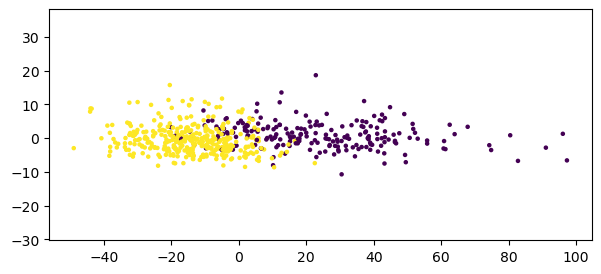

In [19]:
plt.figure(figsize=(7,3))
plt.scatter(D2[:, 0], D2[:, 1], s=5, c=D_Ycol)
plt.axis('equal')
plt.show()

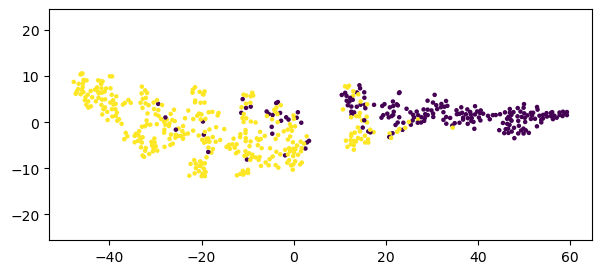

In [20]:
plt.figure(figsize=(7,3))
plt.scatter(D3[:, 0], D3[:, 1], s=5, c=D_Ycol)
plt.axis('equal')
plt.show()

# 6)Для датасетов D1, D2 и D3 проведите кластеризацию с использованием как минимум трех методов кластеризации, рассмотренных в лекции. Оцените качество кластеризации с использованием метрик, рассмотренных в лекции.

In [31]:


from sklearn.cluster import Birch


from sklearn.cluster import MeanShift


from sklearn.mixture import GaussianMixture




In [32]:
def visualize_clusters(cluster_datasets, cluster_results):
    """
    Визуализация результатов кластерного анализа
    """
    plt.subplots(figsize=(10,7))
    plot_num = 0
    for X, y_pred in zip(cluster_datasets, cluster_results):
        plot_num += 1
        plt.subplot(2, 3, plot_num)
        # Цвета точек как результат кластеризации
        colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y_pred) + 1))))
        # черный цвет для выделяющихся значений
        colors = np.append(colors, ["#000000"])
        plt.scatter(X[:, 0], X[:, 1], s=3, color=colors[y_pred])
        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
    
    plt.show()

In [23]:


def do_clustering(cluster_datasets, method):
    """
    Выполнение кластеризации для данных примера
    """
    cluster_results = []
    for X in cluster_datasets:
        temp_cluster = method.fit_predict(X)
        cluster_results.append(temp_cluster)
    return cluster_results



In [24]:


def claster_metrics(method, cluster_datasets, cluster_true_y, datasets_names):
    """
    Вычисление метрик кластеризации
    """
    ari = []
    ami = []
    hl = []
    cl = []
    vl = []
    sl = []
    for X, true_y in zip(cluster_datasets, cluster_true_y):
        temp_cluster = method.fit_predict(X)
        ari.append(adjusted_rand_score(true_y, temp_cluster))
        ami.append(adjusted_mutual_info_score(true_y, temp_cluster))
    
        h, c, v = homogeneity_completeness_v_measure(true_y, temp_cluster)
        hl.append(h)
        cl.append(c)
        vl.append(v)
    
        try:
            sscore = silhouette_score(X, temp_cluster)
        except:
            sscore = None
            
        sl.append(sscore)
    
    result = pd.DataFrame({'Datasets':datasets_names[0:5], 
                           'ARI':ari, 'AMI':ami, 
                           'Homogeneity':hl, 
                           'Completeness':cl, 
                           'V-measure':vl, 'Silhouette':sl})
    return result



In [25]:
cluster_datasets=(D1,D2,D3)
datasets_names=('D1','D2','D3')


In [26]:
cluster_true_y=[]
for i in D_Y:
  cluster_true_y.append(i[0])
cluster_true_y=(cluster_true_y,cluster_true_y,cluster_true_y)

In [27]:
claster_metrics(MeanShift(), cluster_datasets, cluster_true_y, datasets_names)

,Datasets,ARI,AMI,Homogeneity,Completeness,V-measure,Silhouette
0,D1,0.557923,0.461777,0.468423,0.458156,0.463233,0.581597
1,D2,0.557923,0.461777,0.468423,0.458156,0.463233,0.581714
2,D3,0.545561,0.429547,0.434530,0.426153,0.430301,0.623273


In [28]:
claster_metrics(Birch(), cluster_datasets, cluster_true_y, datasets_names)

,Datasets,ARI,AMI,Homogeneity,Completeness,V-measure,Silhouette
0,D1,0.548426,0.461757,0.514985,0.420638,0.463054,0.495422
1,D2,0.266069,0.345598,0.431662,0.290111,0.347006,0.442366
2,D3,0.349468,0.351861,0.463622,0.285233,0.353180,0.490666


In [29]:
claster_metrics(GaussianMixture(n_components=2), cluster_datasets, cluster_true_y, datasets_names)

,Datasets,ARI,AMI,Homogeneity,Completeness,V-measure,Silhouette
0,D1,0.671101,0.548870,0.543138,0.555970,0.549479,0.499454
1,D2,0.493514,0.373071,0.372843,0.374983,0.373910,0.447192
2,D3,0.604550,0.487953,0.493691,0.483671,0.488630,0.584629


In [30]:
claster_metrics(GaussianMixture(n_components=3), cluster_datasets, cluster_true_y, datasets_names)

,Datasets,ARI,AMI,Homogeneity,Completeness,V-measure,Silhouette
0,D1,0.390283,0.361490,0.459845,0.299629,0.362838,0.167155
1,D2,0.531800,0.443734,0.551746,0.372770,0.444934,0.285953
2,D3,0.361477,0.414061,0.549982,0.333531,0.415243,0.512853
